In [32]:
import numpy as np

import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Dense 
from keras.layers import Input, Dense
from keras import backend as K
from keras.models import load_model

##plot and visualize the data against time and observe how the feb 14-21 data is different from the rest of the data   

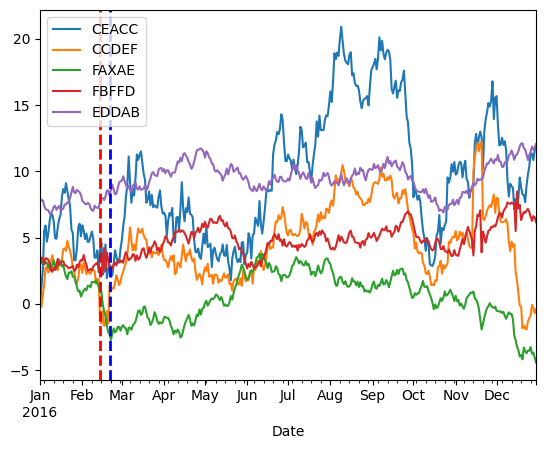

In [33]:
import matplotlib.pyplot as plt
df=pd.read_csv('anomaly_detection2.csv',parse_dates=['Date'])
# df_new=df.drop(['Date'],axis=1)
# df_new.plot()
df.set_index('Date',inplace=True)
df.plot()
plt.axvline(pd.to_datetime('2016-02-14'), color='r', linestyle='--', linewidth=2, label='Event 1')
plt.axvline(pd.to_datetime('2016-02-21'), color='b', linestyle='--', linewidth=2, label='Event 2')
plt.show()

In [34]:

import plotly.express as px
px.line(df,x=df.index,y=['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB'])


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CEACC<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CEACC',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CEACC',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        ,  1.23225977,  2.54012919, ..., 10.84136698, 11.58593208,
                          11.99195242]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=CCDEF<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CCDEF',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CCDEF',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        , -0.21730517,  0.60670884, ..., -0.31712651, -0.71042634,
                          -0.39958795]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FAXAE<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FAXAE',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FAXAE',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 3.        ,  3.19378003,  3.18095   , ..., -3.68039695, -4.04611568,
                          -4.43606537]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FBFFD<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FBFFD',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FBFFD',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([3.        , 3.48999178, 3.46481115, ..., 6.61749071, 6.51904081,
                          6.15513884]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=EDDAB<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'EDDAB',
    

###Data splitting

In [35]:
df.columns

Index(['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB'], dtype='object')

In [36]:
##Training data is between (01/01/2016 to 09/30/2016) and test period: (10/01/2016 to 12/30/2016)
df.drop(['EDDAB'],axis=1,inplace=True)
##merge two periods in training and validation data to accoutnf or data dift after July 

train_df = df.loc['2016-03-15':'2016-08-15']
val_df=df.loc['2016-08-16':'2016-09-30']
anom_test_df=df.loc['2016-02-10':'2016-02-26']
norm_test_df = df.loc['2016-01-01':'2016-02-05']
monitored_period_df=df.loc['2016-01-01':'2016-09-30']
train_df.head(5)

test_df=df.loc['2016-10-01':'2016-12-30']


In [37]:
norm_test_df.index.min()

Timestamp('2016-01-01 00:00:00')

In [38]:
##create sequences out of time series data
def create_seq_data(data,seq_len):
    seq_data=[]
    for i in range(len(data)-seq_len):
        seq_data.append(data[i:i+seq_len])
    return np.array(seq_data)

In [39]:
seq_len=3
X_train_orig=create_seq_data(train_df,seq_len)
X_val_orig=create_seq_data(val_df,seq_len)
X_norm_test_orig=create_seq_data(norm_test_df,seq_len)
X_anom_test_orig=create_seq_data(anom_test_df,seq_len)

X_test_orig=create_seq_data(test_df,seq_len)
X_monitored_period_orig=create_seq_data(monitored_period_df,seq_len)

X_train=X_train_orig.reshape(-1,seq_len,train_df.shape[1])
# X_train=np.delete(X_train,[0,1],2).astype(float)
X_val=X_val_orig.reshape(-1,seq_len,val_df.shape[1])
X_norm_test=X_norm_test_orig.reshape(-1,seq_len,norm_test_df.shape[1])
X_anom_test=X_anom_test_orig.reshape(-1,seq_len,anom_test_df.shape[1])
X_monitored_period=X_monitored_period_orig.reshape(-1,seq_len,monitored_period_df.shape[1])

print(X_train.shape,X_val.shape,X_norm_test.shape,X_anom_test.shape)
print(X_anom_test)

X_test=X_test_orig.reshape(-1,seq_len,test_df.shape[1])

(151, 3, 4) (43, 3, 4) (33, 3, 4) (14, 3, 4)
[[[ 3.47375743  2.46131873  1.63080201  2.94813226]
  [ 3.50540838  1.51870379  1.77735609  3.01439663]
  [ 4.0316598   1.87873178  1.55120058  3.10151955]]

 [[ 3.50540838  1.51870379  1.77735609  3.01439663]
  [ 4.0316598   1.87873178  1.55120058  3.10151955]
  [ 2.39837124  1.86555262  1.31415201  2.70164389]]

 [[ 4.0316598   1.87873178  1.55120058  3.10151955]
  [ 2.39837124  1.86555262  1.31415201  2.70164389]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941]]

 [[ 2.39837124  1.86555262  1.31415201  2.70164389]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487]]

 [[ 4.04372489 -1.21956506  0.90519526  2.28898941]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487]
  [ 2.21029403 -0.57662053 -0.04408993  3.03775938]]

 [[ 4.57628224 -1.49207064  0.89978188  2.13057487]
  [ 2.21029403 -0.57662053 -0.04408993  3.03775938]
  [ 2.4828375  -1.65876658 -0.55054584  4.21502256]]

 [[ 2.2

In [40]:
##retain the time stamps of vectors for future use
# X_train_dates=train_df.index[seq_len:]

# X_train_dates=pd.DataFrame({'Dates':train_df.index[seq_len:], 'CEACC':X_train_orig[:,0,0],'CCDEF':X_train_orig[:,0,1],'FAXAE':X_train_orig[:,0,2],'FBFFD':X_train_orig[:,0,3],'EDDAB':X_train_orig[:,0,4]})
# X_train_dates
X_anom_test_dates=pd.DataFrame({'Dates':anom_test_df.index[seq_len:], 'CEACC':X_anom_test_orig[:,0,0],'CCDEF':X_anom_test_orig[:,0,1],'FAXAE':X_anom_test_orig[:,0,2],'FBFFD':X_anom_test_orig[:,0,3]}) 
X_anom_test_dates

,Dates,CEACC,CCDEF,FAXAE,FBFFD
0,2016-02-13,3.473757,2.461319,1.630802,2.948132
1,2016-02-14,3.505408,1.518704,1.777356,3.014397
2,2016-02-15,4.031660,1.878732,1.551201,3.101520
3,2016-02-16,2.398371,1.865553,1.314152,2.701644
4,2016-02-17,4.043725,-1.219565,0.905195,2.288989
5,2016-02-18,4.576282,-1.492071,0.899782,2.130575
6,2016-02-19,2.210294,-0.576621,-0.044090,3.037759
7,2016-02-20,2.482837,-1.658767,-0.550546,4.215023
8,2016-02-21,4.480263,-1.545013,-0.934196,2.485914
9,2016-02-22,1.943677,-0.539503,-1.623672,3.877839


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed,BatchNormalization,RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error





In [42]:
# Set random seed for reproducibility 
np.random.seed(42) 
tf.random.set_seed(42)

n_features=X_train.shape[2]
n_timesteps=X_train.shape[1]
batch_size=16
early_stopping=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
loss='mae'
metrics=['mae']
model=tf.keras.models.Sequential([
    layers.LSTM(8,return_sequences=True,input_shape=(seq_len,n_features)),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=False,name="Latent"),
    RepeatVector(seq_len),
    #layers.LSTM(8,return_sequences=True),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    layers.TimeDistributed(layers.Dense(n_features))
    ])
model.compile(optimizer='adam',loss=loss,metrics=metrics)
history=model.fit(X_train,X_train,epochs=500,batch_size=batch_size,validation_data=(X_val,X_val),shuffle=True,callbacks=[early_stopping])


Epoch 1/500


c:\Users\ccb\OneDrive\Desktop\Avatheon\v_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 4.9527 - mae: 4.9527 - val_loss: 8.0768 - val_mae: 8.0768
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9293 - mae: 4.9293 - val_loss: 8.0508 - val_mae: 8.0508
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9005 - mae: 4.9005 - val_loss: 8.0201 - val_mae: 8.0201
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8632 - mae: 4.8632 - val_loss: 7.9797 - val_mae: 7.9797
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8132 - mae: 4.8132 - val_loss: 7.9168 - val_mae: 7.9168
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7443 - mae: 4.7443 - val_loss: 7.8260 - val_mae: 7.8260
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6512 - mae: 4.6512 - val_loss: 7.7121 - val_mae: 7.7121
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5353 - mae: 4.5353 - val_loss: 7.5652 - val_mae: 7.5652
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4003 -

[4.835803508758545, 4.811959266662598, 4.782042026519775, 4.742586135864258, 4.689072132110596, 4.615227699279785, 4.517333984375, 4.3970046043396, 4.262206554412842, 4.128793716430664, 4.006773471832275, 3.896193027496338, 3.795081853866577, 3.7009592056274414, 3.6133742332458496, 3.5292208194732666, 3.4471936225891113, 3.367138385772705, 3.2904469966888428, 3.2183825969696045, 3.1499428749084473, 3.0845847129821777, 3.021709680557251, 2.960857629776001, 2.9023332595825195, 2.8460276126861572, 2.7914276123046875, 2.7395083904266357, 2.6895134449005127, 2.6415345668792725, 2.5957090854644775, 2.552635669708252, 2.510777235031128, 2.4709248542785645, 2.4340455532073975, 2.400495767593384, 2.3696775436401367, 2.3409411907196045, 2.3133790493011475, 2.286879062652588, 2.2613039016723633, 2.2364442348480225, 2.2124130725860596, 2.188692331314087, 2.165738105773926, 2.142577648162842, 2.1198205947875977, 2.0958404541015625, 2.0711352825164795, 2.046220302581787, 2.0223195552825928, 1.999655

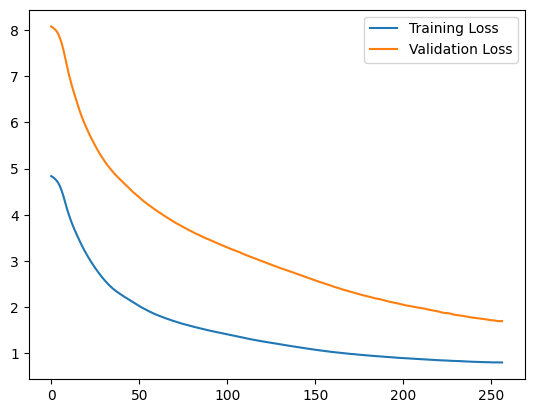

In [43]:
print(history.history["loss"])
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

In [44]:
recons_norm_test_data=model.predict(X_norm_test)
norm_test_data_loss=tf.keras.losses.mae(recons_norm_test_data,X_norm_test)

recons_anom_test_data=model.predict(X_anom_test)
anom_test_data_loss=tf.keras.losses.mae(recons_anom_test_data,X_anom_test)

norm_test_data_loss_mean=np.mean(norm_test_data_loss,axis=1)
anom_test_data_loss_mean=np.mean(anom_test_data_loss,axis=1)




1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/stepWARNING:tensorflow:5 out of the last 20 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002C6B7FEA3B0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


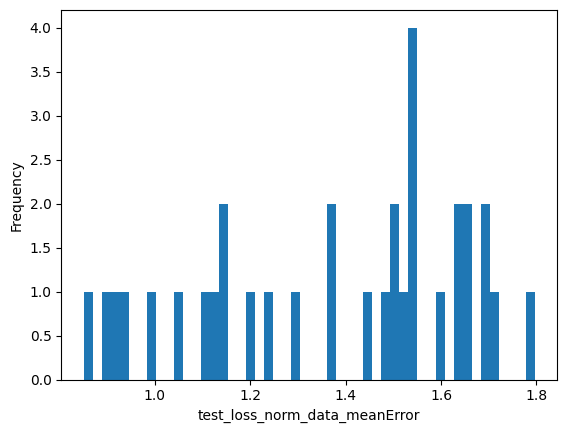

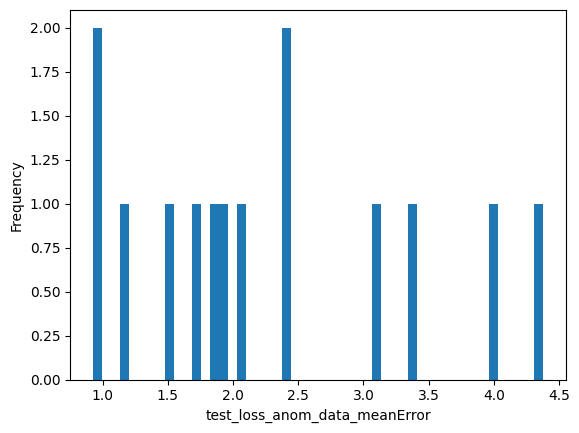

In [45]:
test_loss_norm_data_mean=np.mean(norm_test_data_loss,axis=1)
test_loss_anom_data_mean=np.mean(anom_test_data_loss,axis=1)

plt.hist(test_loss_norm_data_mean,bins=50)
plt.xlabel("test_loss_norm_data_meanError")
plt.ylabel("Frequency")
# plt.xlim(1.5,2)
plt.show()


plt.hist(test_loss_anom_data_mean,bins=50)
plt.xlabel("test_loss_anom_data_meanError")
plt.ylabel("Frequency")
# plt.xlim(1.5,2)
plt.show()

In [46]:
test_loss_norm_data_mean

array([1.63353795, 1.69218393, 1.7963315 , 1.53914478, 1.3780953 ,
       1.43733986, 1.60338941, 1.6518427 , 1.6324825 , 1.71873117,
       1.54609151, 1.4887354 , 1.51147663, 1.53922955, 1.68651651,
       1.53735469, 1.3011398 , 1.15333706, 1.14436127, 1.13200137,
       1.23387055, 1.52596029, 1.66112706, 1.50675169, 1.36287592,
       1.04897371, 1.11060521, 1.20702118, 1.0020033 , 0.9302014 ,
       0.85160156, 0.89449708, 0.91385249])

In [47]:
threshold=np.mean(test_loss_norm_data_mean)+3*np.std(test_loss_norm_data_mean)
print(threshold)

2.1953590051852174


In [48]:
## predict the metrics for test data

# def predict(model,data,threshold):
recons_test_data=model.predict(X_test)
# print(X_test.shape)
data_loss_test=tf.keras.losses.mae(recons_test_data,X_test)
# print(data_loss)
data_loss_test_mean=tf.reduce_mean(data_loss_test,axis=1)
# print(data_loss_test_mean)
results_dated=pd.DataFrame({'Dates':test_df.index[seq_len:],'Loss':data_loss_test_mean})
display(results_dated)

##Normal plot
# results_dated.plot(x='Dates',y='Loss',figsize=(10,5))
# plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

####potly plots for interactivity

fig = px.line(results_dated, x='Dates', y='Loss', title='Loss vs. Dates', labels={'Loss': 'Loss', 'Dates': 'Dates'}) 
# Add a threshold line threshold = 0.5 # Replace with the actual threshold value
fig.add_hline(y=threshold, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold', annotation_position='top left') # Customize the layout 
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white') # Show the plot 




    # # anomalous_data_indices=np.where(data_loss_mean>threshold)
    # return tf.math.less(threshold,data_loss_mean)
# def print_stats(predcitions,labels):
#     print("Accuracy={} ".format(accuracy_score(labels,predictions)))
#     print("Precision={} ".format(precision_score(labels,predictions)))
#     print("Recall={} ".format(recall_score(labels,predictions)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


,Dates,Loss
0,2016-10-04,0.623246
1,2016-10-05,0.524254
2,2016-10-06,0.526196
3,2016-10-07,0.452862
4,2016-10-08,0.640073
...,...,...
83,2016-12-26,3.759518
84,2016-12-27,3.403256
85,2016-12-28,3.294232
86,2016-12-29,3.241021


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 10, 4, 0, 0),
                          datetime.datetime(2016, 10, 5, 0, 0),
                          datetime.datetime(2016, 10, 6, 0, 0),
                          datetime.datetime(2016, 10, 7, 0, 0),
                          datetime.datetime(2016, 10, 8, 0, 0),
                          datetime.datetime(2016, 10, 9, 0, 0),
                          datetime.datetime(2016, 10, 10, 0, 0),
                          datetime.datetime(2016, 10, 11, 0, 0),
                          datetime.datetime(2016, 10, 12, 0, 0),
                          datetime.datetime(2016, 10, 13, 0, 0),
                          datetime.datetime(2016, 10, 14, 0, 0),
                          datetime.datetime(2016, 10, 15, 0, 0),
                          datetime.datetime(2016, 10, 16, 0, 0),
                          datetime.datetime(2016, 10, 17, 0, 0),
                          datetime.datetime(2016, 10, 18, 0, 0),
                          datetime.datetime(2016, 10, 19, 0, 0),
                          datetime.datetime(2016, 10, 20, 0, 0),
                          datetime.datetime(2016, 10, 21, 0, 0),
                          datetime.datetime(2016, 10, 22, 0, 0),
                          datetime.datetime(2016, 10, 23, 0, 0),
                          datetime.datetime(2016, 10, 24, 0, 0),
                          datetime.datetime(2016, 10, 25, 0, 0),
                          datetime.datetime(2016, 10, 26, 0, 0),
                          datetime.datetime(2016, 10, 27, 0, 0),
                          datetime.datetime(2016, 10, 28, 0, 0),
                          datetime.datetime(2016, 10, 29, 0, 0),
                          datetime.datetime(2016, 10, 30, 0, 0),
                          datetime.datetime(2016, 10, 31, 0, 0),
                          datetime.datetime(2016, 11, 1, 0, 0),
                          datetime.datetime(2016, 11, 2, 0, 0),
                          datetime.datetime(2016, 11, 3, 0, 0),
                          datetime.datetime(2016, 11, 4, 0, 0),
                          datetime.datetime(2016, 11, 5, 0, 0),
                          datetime.datetime(2016, 11, 6, 0, 0),
                          datetime.datetime(2016, 11, 7, 0, 0),
                          datetime.datetime(2016, 11, 8, 0, 0),
                          datetime.datetime(2016, 11, 9, 0, 0),
                          datetime.datetime(2016, 11, 10, 0, 0),
                          datetime.datetime(2016, 11, 11, 0, 0),
                          datetime.datetime(2016, 11, 12, 0, 0),
                          datetime.datetime(2016, 11, 13, 0, 0),
                          datetime.datetime(2016, 11, 14, 0, 0),
                          datetime.datetime(2016, 11, 15, 0, 0),
                          datetime.datetime(2016, 11, 16, 0, 0),
                          datetime.datetime(2016, 11, 17, 0, 0),
                          datetime.datetime(2016, 11, 18, 0, 0),
                          datetime.datetime(2016, 11, 19, 0, 0),
                          datetime.datetime(2016, 11, 20, 0, 0),
                          datetime.datetime(2016, 11, 21, 0, 0),
                          datetime.datetime(2016, 11, 22, 0, 0),
                          datetime.datetime(2016, 11, 23, 0, 0),
                          datetime.datetime(2016, 11, 24, 0, 0),
                          datetime.datetime(2016, 11, 25, 0, 0),
                          datetime.datetime(2016, 11, 26, 0, 0),
                          datetime.datetime(2016, 11, 27, 0, 0),
                          datetime.datetime(2016, 11, 28, 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
(271, 3, 4)
tf.Tensor(
[1.63353795 1.69218393 1.7963315  1.53914478 1.3780953  1.43733986
 1.60338941 1.6518427  1.6324825  1.71873117 1.54609151 1.4887354
 1.51147663 1.53922955 1.68651651 1.53735469 1.3011398  1.15333706
 1.14436127 1.13200137 1.23387055 1.52596029 1.66112706 1.50675169
 1.36287592 1.04897371 1.11060521 1.20702118 1.0020033  0.9302014
 0.85160156 0.89449708 0.91385243 0.97331642 1.01215936 1.07408475
 1.14398204 1.12026535 1.21386758 1.115274   0.92231731 0.9393886
 1.17559204 1.48435328 1.88204003 1.9088214  2.42984219 3.97795465
 4.38070546 3.36142868 3.08656739 2.08780739 2.39987403 1.71243568
 1.41097015 1.2714419  1.20315449 1.23024404 1.21865898 1.14822635
 0.94108427 0.92603054 1.00001839 1.17380181 1.44361634 1.43318476
 1.065829   0.83237842 0.8053392  0.99147967 1.10520497 0.9395731
 0.86667395 0.84210749 0.79598488 0.6381974  0.68096286 0.65090713
 0.51996067 0.47246045 0.53933687 0.4583638  0.41841763 0.26805816
 0.22

,Dates,Loss
0,2016-01-04,1.633538
1,2016-01-05,1.692184
2,2016-01-06,1.796332
3,2016-01-07,1.539145
4,2016-01-08,1.378095
...,...,...
266,2016-09-26,1.726446
267,2016-09-27,1.596037
268,2016-09-28,1.353997
269,2016-09-29,1.197907


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 1, 4, 0, 0),
                          datetime.datetime(2016, 1, 5, 0, 0),
                          datetime.datetime(2016, 1, 6, 0, 0), ...,
                          datetime.datetime(2016, 9, 28, 0, 0),
                          datetime.datetime(2016, 9, 29, 0, 0),
                          datetime.datetime(2016, 9, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1.63353795, 1.69218393, 1.7963315 , ..., 1.3539968 , 1.19790728,
                          1.1766543 ]),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'Threshold',
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'x domain',
                                'y': 2.1953590051852174,
                                'yanchor': 'bottom',
                                'yref': 'y'}],
               'legend': {'title': {'text': 'Legend'}, 'tracegroupgap': 0},
               'shapes': [{'line': {'color': 'red', 'dash': 'dash', 'width': 2},
                           'type': 'line',
                           'x0': 0,
                           'x1': 1,
                           'xref': 'x domain',
                           'y0': 2.1953590051852174,
                           'y1': 2.1953590051852174,
                           'yref': 'y'}],
               'template': '...',
               'title': {'text': 'Loss vs. Dates'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Dates'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

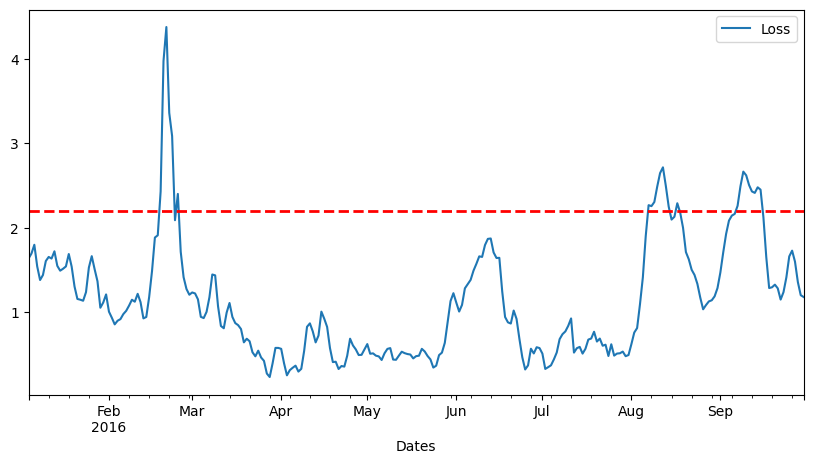

In [49]:
##plot the results for monitored period data to see number of anomalies and if the Feb 14 anaomaly is the only one being captured
recons_monitored_data=model.predict(X_monitored_period)
print(X_monitored_period.shape)
data_loss_monitored=tf.keras.losses.mae(recons_monitored_data,X_monitored_period)
# print(data_loss)
data_loss_monitored_mean=tf.reduce_mean(data_loss_monitored,axis=1)
print(data_loss_monitored_mean)
chk_monitored_data_dated=pd.DataFrame({'Dates':monitored_period_df.index[seq_len:],'Loss':data_loss_monitored_mean})
display(chk_monitored_data_dated)
chk_monitored_data_dated.plot(x='Dates',y='Loss',figsize=(10,5))
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

###plot plotly plots for train data to analyze 

fig = px.line(chk_monitored_data_dated, x='Dates', y='Loss', title='Loss vs. Dates', labels={'Loss': 'Loss', 'Dates': 'Dates'}) # Add a threshold line threshold = 0.5 # Replace with the actual threshold value 
fig.add_hline(y=threshold, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold', annotation_position='top left') # Customize the layout
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white' ) # Show the plot fig.show()

In [50]:
##There has been a data drift since july 2016 and hence the model has to be retrained with the new data to capture the anomalies    

In [51]:
train2_df = df.loc['2016-07-20':'2016-08-20']
val2_df=df.loc['2016-08-20':'2016-08-30']
norm2_test_df=df.loc['2016-09-01':'2016-09-30']


In [52]:
X2_train_orig=create_seq_data(train2_df,seq_len)
X2_val_orig=create_seq_data(val2_df,seq_len)
X2_norm_test_orig=create_seq_data(norm2_test_df,seq_len)

X2_train=X2_train_orig.reshape(-1,seq_len,train2_df.shape[1])
X2_val=X2_val_orig.reshape(-1,seq_len,val2_df.shape[1])
X2_norm_test=X2_norm_test_orig.reshape(-1,seq_len,norm2_test_df.shape[1])



In [53]:
# Set random seed for reproducibility 
np.random.seed(42)
tf.random.set_seed(42)

n2_features=X2_train.shape[2]
n2_timesteps=X2_train.shape[1]
batch_size=16
early_stopping=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
loss='mae'
metrics=['mae']
model2=tf.keras.models.Sequential([
    layers.LSTM(8,return_sequences=True,input_shape=(seq_len,n2_features)),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=False,name="Latent"),
    RepeatVector(seq_len),
    #layers.LSTM(8,return_sequences=True),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    layers.TimeDistributed(layers.Dense(n2_features))
    ])
model2.compile(optimizer='adam',loss=loss,metrics=metrics)
history2=model2.fit(X2_train,X2_train,epochs=500,batch_size=batch_size,validation_data=(X2_val,X2_val),shuffle=True,callbacks=[early_stopping])


Epoch 1/500


c:\Users\ccb\OneDrive\Desktop\Avatheon\v_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 697ms/step - loss: 7.8929 - mae: 7.8929 - val_loss: 7.3166 - val_mae: 7.3166
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 7.8862 - mae: 7.8862 - val_loss: 7.3102 - val_mae: 7.3102
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 7.8797 - mae: 7.8797 - val_loss: 7.3038 - val_mae: 7.3038
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 7.8733 - mae: 7.8733 - val_loss: 7.2974 - val_mae: 7.2974
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 7.8667 - mae: 7.8667 - val_loss: 7.2909 - val_mae: 7.2909
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 7.8601 - mae: 7.8601 - val_loss: 7.2843 - val_mae: 7.2843
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 7.8534 - mae: 7.8534 - val_loss: 7.2776 - val_mae: 7.2776
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 7.8465 - mae: 7.8465 - val_loss: 7.2707 - val_mae: 7.2707
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 7.8394 - mae: 7.8394 - v

[7.927979469299316, 7.921360015869141, 7.914857864379883, 7.908383369445801, 7.90185022354126, 7.895219326019287, 7.888467788696289, 7.881565570831299, 7.8744797706604, 7.867177963256836, 7.859620571136475, 7.851759910583496, 7.843541622161865, 7.83489990234375, 7.825760364532471, 7.816044330596924, 7.805670261383057, 7.7945556640625, 7.782618045806885, 7.769775390625, 7.755941390991211, 7.741029739379883, 7.724951267242432, 7.707612037658691, 7.688915252685547, 7.668763160705566, 7.647050380706787, 7.623672962188721, 7.598524570465088, 7.571502685546875, 7.542511940002441, 7.511467456817627, 7.478300094604492, 7.442964553833008, 7.405440807342529, 7.3657426834106445, 7.323916912078857, 7.280048370361328, 7.234258651733398, 7.186819076538086, 7.13876485824585, 7.090418338775635, 7.041787147521973, 6.9925336837768555, 6.9428815841674805, 6.894235610961914, 6.846528053283691, 6.7995405197143555, 6.753512859344482, 6.707816123962402, 6.662744045257568, 6.618442535400391, 6.575284957885742

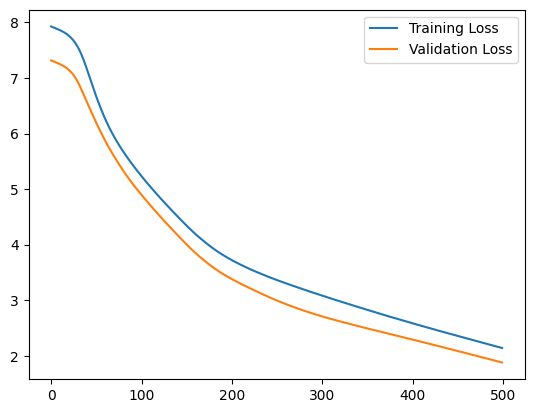

In [54]:
print(history2.history["loss"])
plt.plot(history2.history["loss"],label="Training Loss")
plt.plot(history2.history["val_loss"],label="Validation Loss")
plt.legend()

In [55]:
recons_norm2_test_data=model2.predict(X2_norm_test)
norm2_test_data_loss=tf.keras.losses.mae(recons_norm2_test_data,X2_norm_test)

# recons_anom2_test_data=model2.predict(X2_anom_test)
# anom2_test_data_loss=tf.keras.losses.mae(recons_anom2_test_data,X2_anom_test)

norm2_test_data_loss_mean=np.mean(norm2_test_data_loss,axis=1)
# anom2_test_data_loss_mean=np.mean(anom2_test_data_loss,axis=1)
threshold2=np.mean(norm2_test_data_loss_mean)##+2*np.std(norm2_test_data_loss_mean)
print(threshold2)  ###less confoidence on the threshold value due to limited training data after the drift

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
2.356346922622534


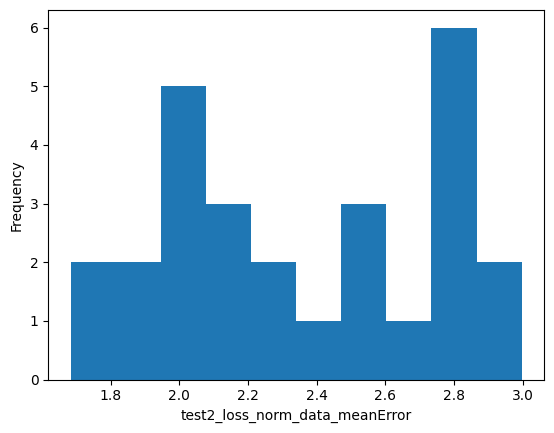

In [56]:
test2_loss_norm_data_mean=np.mean(norm2_test_data_loss,axis=1)


plt.hist(test2_loss_norm_data_mean)
plt.xlabel("test2_loss_norm_data_meanError")
plt.ylabel("Frequency")
# plt.xlim(1.5,2)
plt.show()




###Model predictions for the uiltimate test data not analyzed yet( Prtedcitiona period)

In [57]:
recons_new_test_data=model2.predict(X_test)
test_data_loss_new=tf.keras.losses.mae(recons_new_test_data,X_test)

# recons_anom2_test_data=model2.predict(X2_anom_test)
# anom2_test_data_loss=tf.keras.losses.mae(recons_anom2_test_data,X2_anom_test)

test_data_loss_new_mean=np.mean(test_data_loss_new,axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step 


In [58]:
new_results_dated=pd.DataFrame({'Dates':test_df.index[seq_len:],'Loss':test_data_loss_new_mean})
display(new_results_dated)

##Normal plot
# results_dated.plot(x='Dates',y='Loss',figsize=(10,5))
# plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

####potly plots for interactivity

fig = px.line(new_results_dated, x='Dates', y='Loss', title='Loss vs. Dates for new model', labels={'Loss': 'Loss', 'Dates': 'Dates'}) 
# Add a threshold line threshold = 0.5 # Replace with the actual threshold value
fig.add_hline(y=threshold2, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold_2', annotation_position='top left') # Customize the layout 
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white') # Show the plot 


,Dates,Loss
0,2016-10-04,1.955076
1,2016-10-05,1.984353
2,2016-10-06,2.036503
3,2016-10-07,2.134056
4,2016-10-08,2.243714
...,...,...
83,2016-12-26,4.603317
84,2016-12-27,4.375201
85,2016-12-28,4.241205
86,2016-12-29,4.283669


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 10, 4, 0, 0),
                          datetime.datetime(2016, 10, 5, 0, 0),
                          datetime.datetime(2016, 10, 6, 0, 0),
                          datetime.datetime(2016, 10, 7, 0, 0),
                          datetime.datetime(2016, 10, 8, 0, 0),
                          datetime.datetime(2016, 10, 9, 0, 0),
                          datetime.datetime(2016, 10, 10, 0, 0),
                          datetime.datetime(2016, 10, 11, 0, 0),
                          datetime.datetime(2016, 10, 12, 0, 0),
                          datetime.datetime(2016, 10, 13, 0, 0),
                          datetime.datetime(2016, 10, 14, 0, 0),
                          datetime.datetime(2016, 10, 15, 0, 0),
                          datetime.datetime(2016, 10, 16, 0, 0),
                          datetime.datetime(2016, 10, 17, 0, 0),
                          datetime.datetime(2016, 10, 18, 0, 0),
                          datetime.datetime(2016, 10, 19, 0, 0),
                          datetime.datetime(2016, 10, 20, 0, 0),
                          datetime.datetime(2016, 10, 21, 0, 0),
                          datetime.datetime(2016, 10, 22, 0, 0),
                          datetime.datetime(2016, 10, 23, 0, 0),
                          datetime.datetime(2016, 10, 24, 0, 0),
                          datetime.datetime(2016, 10, 25, 0, 0),
                          datetime.datetime(2016, 10, 26, 0, 0),
                          datetime.datetime(2016, 10, 27, 0, 0),
                          datetime.datetime(2016, 10, 28, 0, 0),
                          datetime.datetime(2016, 10, 29, 0, 0),
                          datetime.datetime(2016, 10, 30, 0, 0),
                          datetime.datetime(2016, 10, 31, 0, 0),
                          datetime.datetime(2016, 11, 1, 0, 0),
                          datetime.datetime(2016, 11, 2, 0, 0),
                          datetime.datetime(2016, 11, 3, 0, 0),
                          datetime.datetime(2016, 11, 4, 0, 0),
                          datetime.datetime(2016, 11, 5, 0, 0),
                          datetime.datetime(2016, 11, 6, 0, 0),
                          datetime.datetime(2016, 11, 7, 0, 0),
                          datetime.datetime(2016, 11, 8, 0, 0),
                          datetime.datetime(2016, 11, 9, 0, 0),
                          datetime.datetime(2016, 11, 10, 0, 0),
                          datetime.datetime(2016, 11, 11, 0, 0),
                          datetime.datetime(2016, 11, 12, 0, 0),
                          datetime.datetime(2016, 11, 13, 0, 0),
                          datetime.datetime(2016, 11, 14, 0, 0),
                          datetime.datetime(2016, 11, 15, 0, 0),
                          datetime.datetime(2016, 11, 16, 0, 0),
                          datetime.datetime(2016, 11, 17, 0, 0),
                          datetime.datetime(2016, 11, 18, 0, 0),
                          datetime.datetime(2016, 11, 19, 0, 0),
                          datetime.datetime(2016, 11, 20, 0, 0),
                          datetime.datetime(2016, 11, 21, 0, 0),
                          datetime.datetime(2016, 11, 22, 0, 0),
                          datetime.datetime(2016, 11, 23, 0, 0),
                          datetime.datetime(2016, 11, 24, 0, 0),
                          datetime.datetime(2016, 11, 25, 0, 0),
                          datetime.datetime(2016, 11, 26, 0, 0),
                          datetime.datetime(2016, 11, 27, 0, 0),
                          datetime.datetime(2016, 11, 28, 0

In [59]:
potential_anom=new_results_dated.loc[new_results_dated['Loss']>threshold2]
# print(potential_anom)
# Function to identify consecutive date ranges
def find_consecutive_ranges(dates, min_days=3, max_days=14):
    consecutive_ranges = []
    start_date = dates[0]
    prev_date = dates[0]

    for date in dates[1:]:
        if (date - prev_date).days != 1:
            range_length = (prev_date - start_date).days + 1
            if min_days <= range_length <= max_days:
                consecutive_ranges.append((start_date, prev_date))
            print(f"Range: {start_date} to {prev_date} - Length: {range_length} days")
            start_date = date
        prev_date = date

    range_length = (prev_date - start_date).days + 1
    if min_days <= range_length <= max_days:
        consecutive_ranges.append((start_date, prev_date))
    print(f"Range: {start_date} to {prev_date} - Length: {range_length} days")

    return consecutive_ranges

# Identify consecutive date ranges in the DataFrame
consecutive_dates = potential_anom['Dates'].tolist()
consecutive_ranges = find_consecutive_ranges(consecutive_dates)

# Print consecutive ranges to debug
# print(f"Consecutive Ranges: {consecutive_ranges}")

# Select dates that are part of the desired ranges
selected_dates = []
for start_date, end_date in consecutive_ranges:
    selected_dates.extend(pd.date_range(start=start_date, end=end_date).tolist())

selected_df = potential_anom[potential_anom['Dates'].isin(selected_dates)]

# Display the selected DataFrame
print(selected_df.Dates)


Range: 2016-10-09 00:00:00 to 2016-10-27 00:00:00 - Length: 19 days
Range: 2016-11-20 00:00:00 to 2016-11-22 00:00:00 - Length: 3 days
Range: 2016-11-29 00:00:00 to 2016-11-29 00:00:00 - Length: 1 days
Range: 2016-12-01 00:00:00 to 2016-12-02 00:00:00 - Length: 2 days
Range: 2016-12-10 00:00:00 to 2016-12-30 00:00:00 - Length: 21 days
47   2016-11-20
48   2016-11-21
49   2016-11-22
Name: Dates, dtype: datetime64[ns]


In [61]:
model2.save('lstm_autoencoder_model.keras')